In [28]:
import random
import seaborn as sns

In [2]:
random.random()

0.7301624897761201

In [7]:
random.randint(1,56)

4

In [19]:
random.choice([1,2,3])

1

In [20]:
# ejemplo: vamos a elegir un n'umero de 1 a 10, y comprobar las probs. de elegir cada n'umero

casos = list(range(1,11))
casos

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [22]:
random.choice(casos)

4

In [34]:
d = {}
for c in casos:
    d[c] = 0

N = 10000
resultados = []
for k in range(N):
    r = random.choice(casos)
    d[r] += 1
    resultados.append(r)

/home/dsc/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


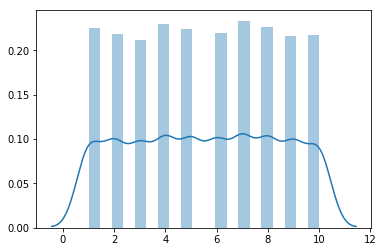

In [146]:
sns.distplot(resultados)   #, bins=casos+[11])

In [139]:
def jugar(puertas, cambia=False):
    assert len(puertas) == 3
    
    puerta = random.choice(range(len(puertas)))
    #print("El concursante elige la puerta %d" % puerta)

    primera_puerta = puertas.index(0)
    segunda_puerta = puertas.index(0,primera_puerta + 1)
    
    puertas_presentador = set([primera_puerta, segunda_puerta]) - set([puerta])
    presenta = random.choice(list(puertas_presentador))
    #print("El presentador muestra la puerta %d" % presenta)

    assert puerta != presenta
    
    puerta_cambiada_set = set([0,1,2]) - set([puerta, presenta])
    puerta_cambiada = puerta_cambiada_set.pop()
    
    if cambia:
        puerta = puerta_cambiada
    
    assert puerta in (set([0,1,2]) - set([presenta]))
                                     
    ha_ganado = (puertas[puerta] == 1)
    
    return ha_ganado

In [140]:
jugar([0,1,0], True)

True

In [141]:
def experimento(N, puertas, cambia):

    aciertos = 0
    for k in range(N):
        r = jugar([0,1,0], cambia)
        if r:
            aciertos += 1
            
    return aciertos/N

In [142]:
experimento(1000, [0,1,0], True)

0.65

In [144]:
experimentos_sin_cambiar = [experimento(1000, [0,1,0], False) for k in range(1000)]
experimentos_con_cambio = [experimento(1000, [0,1,0], True) for k in range(1000)]

/home/dsc/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


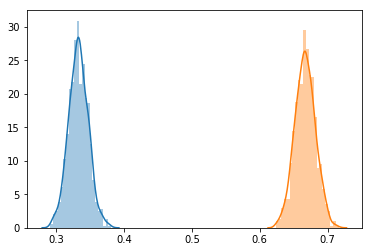

In [145]:
sns.distplot(experimentos_sin_cambiar); sns.distplot(experimentos_con_cambio)